## Geomagnetic storm magnitude in a historic context

In [49]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
import urllib
import pandas as pd
import os
import sys
import importlib


import plotly.graph_objects as go
import numpy as np
from plotly.offline import iplot, init_notebook_mode


#import 
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging


outputdir='results/icme_rate/'

##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    from config_server import data_path
    matplotlib.use('Agg') 
   
        
#mac
if sys.platform =='darwin':  
    print('system is mac')
    from config_local import data_path    
    #matplotlib.use('Agg') 
    %matplotlib inline     

print(data_path)


os.system('jupyter nbconvert --to script geomagnetic_storms.ipynb')    




system is mac
/Users/chris/python/data/insitu_python/


[NbConvertApp] Converting notebook geomagnetic_storms.ipynb to script
[NbConvertApp] Writing 7016 bytes to geomagnetic_storms.py


0

### get Dst data

In [44]:
##get omni dst data
get_new_data=0

fileomni="omni_1963_now.p"
if get_new_data: hd.save_omni_data(data_path,fileomni)
[o,ho]=pickle.load(open(data_path+fileomni, "rb" ) )  

print(data_path+fileomni)

start=datetime.datetime.utcnow() - datetime.timedelta(days=2*365)
end=datetime.datetime.utcnow() 
#hp.plot_insitu_update(o, start, end,'OMNI2',outputdir,now=True)


#get current dst last 35 days
filenoaa='noaa_dst_last_35files_now.p'
n=pickle.load(open(data_path+filenoaa, "rb" ) )  


#get current dst last 300 days
#filenoaa='noaa_dst_last_300files_now.p'
#n2=pickle.load(open(data_path+filenoaa, "rb" ) )  

############### TO DO stitch together n and n2


#take only last year in the omni data
os=o.dst[-24*365:]
ot=o.time[-24*365:]

#search for the latest data point of omni in noaa dst, and cutoff the noaa dst
cutoff=np.where(np.isfinite(os)==False)[0][0]
print(ot[cutoff])
cutoffnoaa=np.where(n.time > ot[cutoff])[0][0]
print(cutoffnoaa)
#cut noaa dst array
n=n[cutoffnoaa:]


/Users/chris/python/data/insitu_python/omni_1963_now.p
2023-09-18 13:00:00
1438


### plot Dst

77.0 -422.0


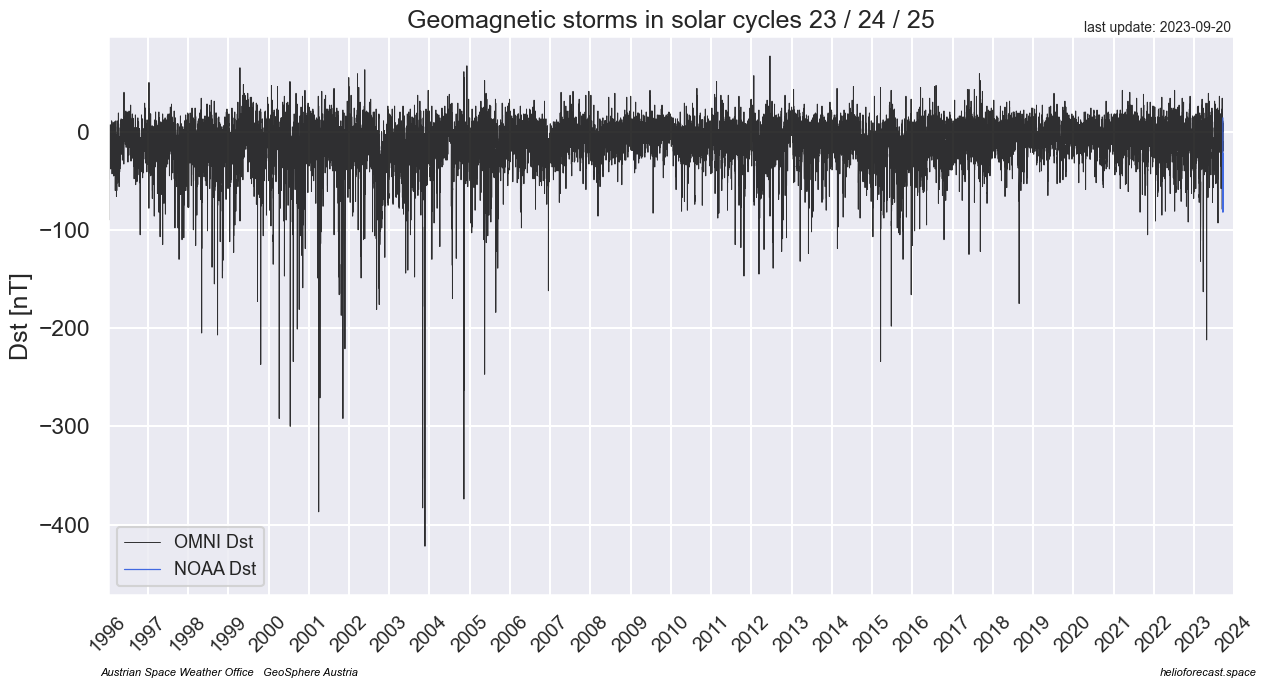

In [45]:
years=np.arange(1995,2040) 
yearly_start_times=[datetime.datetime(year,1,1) for year in years]

sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')
#stack both OMNI and NOAA Dst and determine min max for last 25 years
plotmin=np.nanmin(np.hstack([o.dst,n.dst])[-365*24*25:-1] )
plotmax=np.nanmax(np.hstack([o.dst,n.dst])[-365*24*25:-1] )
print(plotmax, plotmin)
ax1.set_ylim(plotmin-50,plotmax+20)

ax1.set_xlim(start,end)

plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(yearly_start_times, fontsize=14,rotation=45) 

ax1.set_xlim(datetime.datetime(1996,1,1),datetime.datetime(2024,1,1))

#ax1.set_xlim(datetime.datetime(2023,1,1),datetime.datetime(2024,1,1))

#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Geomagnetic storms in solar cycles 23 / 24 / 25',fontsize=18)

fsize=12
plt.legend(loc=3,fontsize=13)
plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-4, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=fsize-4, style='italic')

plt.figtext(0.96,0.93,'last update: '+str(datetime.datetime.utcnow())[0:10], ha='right', fontsize=10)
plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_all.png',dpi=100)



39.0 -212.0
saved as results/icme_rate/geomagnetic_storm_latest.png


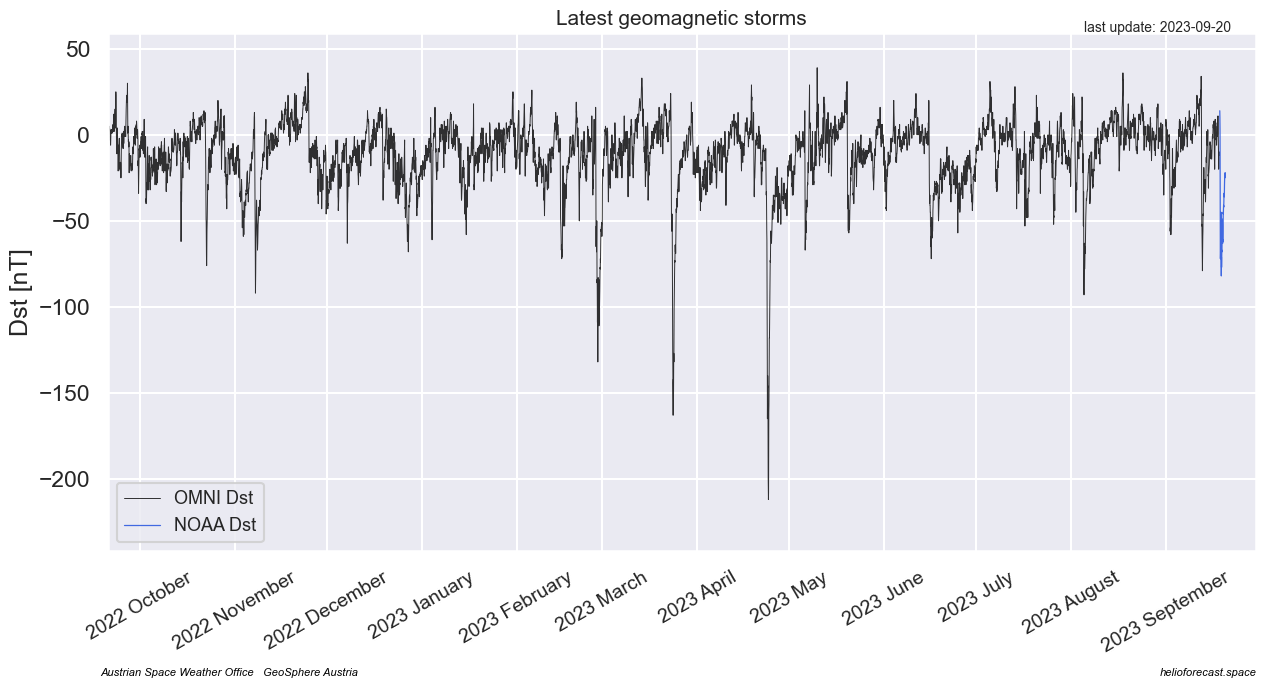

In [48]:
years=np.arange(1995,2040) 
months=np.arange(1,13)
monthly_start_times=[datetime.datetime(year,month,1) for year in years for month in months]


sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)


ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')


#stack both OMNI and NOAA Dst and determine min max for last year
plotmin=np.nanmin(np.hstack([o.dst,n.dst])[-365*24:-1])
plotmax=np.nanmax(np.hstack([o.dst,n.dst])[-365*24:-1])
print(plotmax, plotmin)

ax1.set_xlim(start,end)
ax1.set_ylim(plotmin-30,plotmax+20)
plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(monthly_start_times, fontsize=14,rotation=30) 


ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=365),datetime.datetime.utcnow()+datetime.timedelta(days=10))

#ax1.set_xlim(datetime.datetime(2023,1,1),datetime.datetime(2024,1,1))

#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Latest geomagnetic storms',fontsize=15)

fsize=12
plt.legend(loc=3,fontsize=13)
plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-4, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=fsize-4, style='italic')
plt.figtext(0.96,0.93,'last update: '+str(datetime.datetime.utcnow())[0:10], ha='right', fontsize=10)
plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_latest.png',dpi=100)


print('saved as', outputdir+'geomagnetic_storm_latest.png')
##histogram

In [47]:
#save data for last few months as txt

dst=np.hstack([os[cutoff-24*180:cutoff],n.dst])
time=np.hstack([ot[cutoff-24*180:cutoff],n.time])
output_format='%Y-%m-%dT%H:%MZ'
time=[ts.strftime(output_format) for ts in time]

data=np.zeros(len(time),dtype=[('time','U17'),('dst', float)])   

#convert to recarray
data = data.view(np.recarray)  
data.time=time
data.dst=dst


#save latest year as file
np.savetxt(outputdir+'geomagnetic_storm_latest.txt',data, delimiter=' ', fmt='%s %d', header='time [UT]   Dst [nT] / data from OMNI2, NOAA. ASWO, GeoSphere Austria  created '+str(datetime.datetime.utcnow())[0:16])
print('saved as', outputdir+'geomagnetic_storm_latest.txt')

print(' ')
print('latest data point',data.time[-1])

saved as results/icme_rate/geomagnetic_storm_latest.txt
 
latest data point 2023-09-20T09:00Z


In [29]:
print(' ')
print(' ')
print('Dst update png and txt done ')

print('------------------------')

 
 
Dst update png and txt done 
------------------------


#### looking into the data

In [30]:
#https://plotly.com/python/


data_lookup=0


if data_lookup > 0:

    #init_notebook_mode(connected = True)
    init_notebook_mode(connected = False)

    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=o.time, y=o.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()

In [31]:
if data_lookup > 0:
    
    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=n.time, y=n.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()
